# Definition(s)

The closest pair of points problem or closest pair problem is a problem of computational geometry: given n points in metric space, find a pair of points with the smallest distance between them. 

The closest pair problem for points in the Euclidean plane was among the first geometric problems that were treated at the origins of the systematic study of the computational complexity of geometric algorithms.

# Algorithm(s)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from operator import itemgetter

%matplotlib inline

In [2]:
def euclid_distance(p, q):
    return np.sqrt((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2)

In [3]:
def search(points, st, dr):
    if st >= dr:
        return np.inf, None, None
    elif st + 1 == dr:
        # sort on y
        if points[st][1] > points[dr][1]:
            points[st], points[dr] = points[dr], points[st]
        return euclid_distance(points[st], points[dr]), points[st], points[dr]

    m = (st + dr) // 2
    median_x = points[m][0]

    dleft, pleft, qleft = search(points, st, m)
    dright, pright, qright = search(points, m + 1, dr)

    if dleft < dright:
        d, p, q = dleft, pleft, qleft
    else:
        d, p, q = dright, pright, qright

    # merge the two halves on y
    aux = []
    i, j = st, m + 1

    while i <= m and j <= dr:
        if points[i][1] <= points[j][1]:
            aux.append(points[i])
            i += 1
        else:
            aux.append(points[j])
            j += 1

    while i <= m:
        aux.append(points[i])
        i += 1

    while j <= dr:
        aux.append(points[j])
        j += 1

    # copy back the points
    points[st:dr+1] = aux

    # select a set of points to be tested
    good_points = []

    for i in range(st, dr + 1):
        if abs(points[i][0] - median_x) <= d:
            good_points.append(points[i])
            
    for i in range(len(good_points)):
        j, cnt = i - 1, 8

        # go for at most 8 steps
        while j >= 0 and cnt > 0:
            tmp_d = euclid_distance(aux[i], aux[j])
            if tmp_d < d:
                d, p, q = tmp_d, aux[i], aux[j]

            j -= 1
            cnt -= 1

    return d, p, q

def closest_pair(points):
    points.sort(key = itemgetter(0))
    
    return search(points, 0, len(points) - 1)

### Naive implementation of closest_pair

In [4]:
def naive_closest_pair(points):
    best, p, q = np.inf, None, None
    n = len(points)

    for i in range(n):
        for j in range(i + 1, n):
            d = euclid_distance(points[i], points[j])

            if d < best:
                best, p, q = d, points[i], points[j]

    return best, p, q

### Draw points (with closest-pair marked as red)

In [5]:
def draw_points(points, p, q):
    xs, ys = zip(*points)
    plt.figure(figsize=(10,10))
    plt.scatter(xs, ys)
    plt.scatter([p[0], q[0]], [p[1], q[1]], s=100, c='red')
    plt.plot([p[0], q[0]], [p[1], q[1]], 'k', c='red')
    plt.show()

# Run(s)

The closest pair of points is ((66, 77), (71, 95)) at distance 18.681541692269406


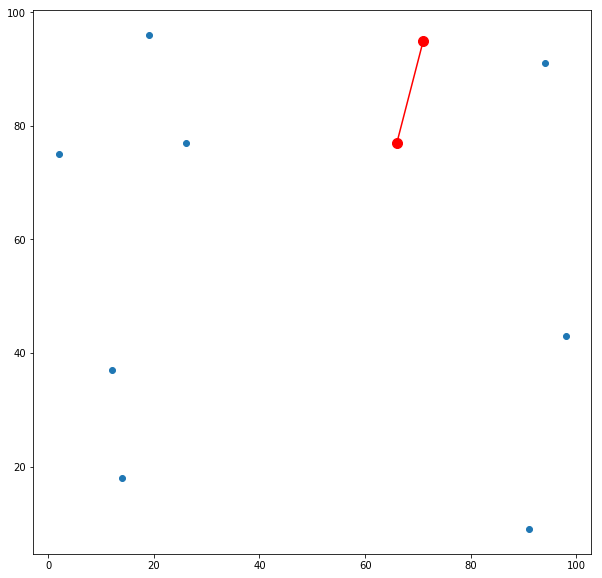

In [6]:
points = [(26, 77), (12, 37), (14, 18), (19, 96), (71, 95), (91, 9), (98, 43), (66, 77), (2, 75), (94, 91)]

xs, ys = zip(*points)

d, p, q = closest_pair(points)
assert d == naive_closest_pair(points)[0]

print("The closest pair of points is ({0}, {1}) at distance {2}".format(p, q, d))

draw_points(points, p, q)

The closest pair of points is ((71.074721300595129, 24.832192386236439), (74.09492734061395, 14.947443509594061)) at distance 10.335855304639715


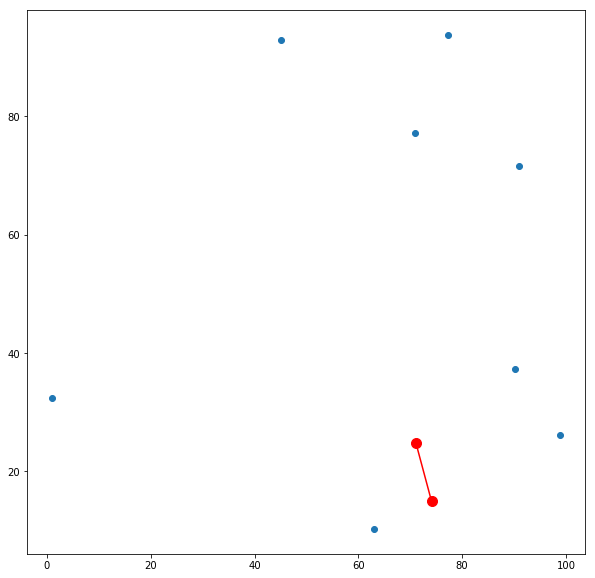

In [8]:
N = 10
x = np.random.rand(N) * 100
y = np.random.rand(N) * 100

points = list(zip(x, y))

d, p, q = closest_pair(points)
assert d == naive_closest_pair(points)[0]

print("The closest pair of points is ({0}, {1}) at distance {2}".format(p, q, d))

draw_points(points, p, q)

The closest pair of points is ((71, 59), (76, 61)) at distance 5.385164807134504


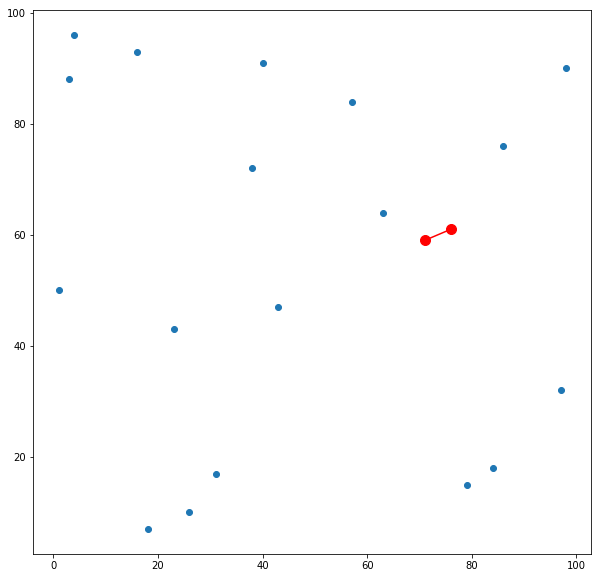

In [9]:
N = 20
x = np.random.randint(100, size=N)
y = np.random.randint(100, size=N)

points = list(zip(x, y))

d, p, q = closest_pair(points)
assert d == naive_closest_pair(points)[0]

print("The closest pair of points is ({0}, {1}) at distance {2}".format(p, q, d))

draw_points(points, p, q)

The closest pair of points is ((0.90216690037000002, 0.040293494361602344), (0.94031501471282197, 0.04016455177547773)) at distance 0.038148332258481944


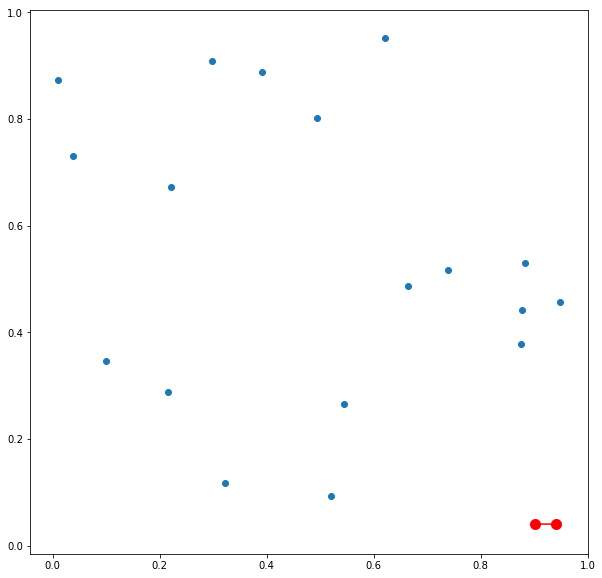

In [13]:
N = 20
x = np.random.rand(N)
y = np.random.rand(N)

points = list(zip(x, y))

d, p, q = closest_pair(points)
assert d == naive_closest_pair(points)[0]

print("The closest pair of points is ({0}, {1}) at distance {2}".format(p, q, d))

draw_points(points, p, q)